# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 

## Standard Section 1: Introduction to Web Scraping

**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner<br/>
**Section Leaders**: Marios Mattheakis, Abhimanyu (Abhi) Vasishth, Robbert (Rob) Struyven<br/>



<hr style='height:2px'>

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

When we're done today, you will approach messy real-world data with confidence that you can get it into a format that you can manipulate.

Specifically, our learning objectives are:
* Understand the structure of an HTML document and use that structure to extract desired information
* Use Python data structures such as lists, dictionaries, and Pandas DataFrames to store and manipulate information
* Identify some other (semi-)structured formats commonly used for storing and transferring data, such as JSON and CSV
* Practice using [Python](https://docs.python.org/3.6/) packages such as [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) and [Pandas](https://pandas.pydata.org/pandas-docs/stable/), including how to navigate their documentation to find functionality.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")
import json

import requests
from bs4 import BeautifulSoup
from IPython.display import HTML

In [3]:
# Setting up 'requests' to make HTTPS requests properly takes some extra steps... we'll skip them for now.
requests.packages.urllib3.disable_warnings()

import warnings
warnings.filterwarnings("ignore")

## Goals

Is science becoming more collaborative over time? How about literature? Are there a few "geniuses" or lots of hard workers? One way we might answer those questions is by looking at Nobel Prizes. We could ask questions like:

* Has anyone won a prize more than once?
* How has the total number of recipients changed over time?
* How has the number of recipients per award changed over time?


To answer these questions, we'll need data: *who* received *what* award *when*. 

Before we dive into acquiring this data the way we've been teaching in class, let's pause to ask: **what are 5 different approaches we could take to acquiring Nobel Prize data**?





## When possible: find a structured dataset (.csv,.json,.xls)

After a google search we stumble upon this [dataset on github](https://github.com/OpenRefine/OpenRefine/blob/master/main/tests/data/nobel-prize-winners.csv). It is also in the section folder named `github-nobel-prize-winners.csv`.

We use pandas to read it: 

In [4]:
df = pd.read_csv("../data/github-nobel-prize-winners.csv")
df.head()

,year,discipline,winner,desc
0,1901,chemistry,Jacobus H. van 't Hoff,in recognition of the extraordinary services h...
1,1901,literature,Sully Prudhomme,in special recognition of his poetic compositi...
2,1901,medicine,Emil von Behring,"for his work on serum therapy, especially its ..."
3,1901,peace,Henry Dunant,NaN
4,1901,peace,Fr&eacute;d&eacute;ric Passy,NaN


Or you may want to read an xlsx file:

(Potential missing package; you might need to run the following command in your terminal first: ```!conda install xlrd```)

In [5]:
df = pd.read_excel("../data/github-nobel-prize-winners.xlsx")
df.head()

,year,discipline,winner,desc
0,1901,chemistry,Jacobus H. van 't Hoff,in recognition of the extraordinary services h...
1,1901,literature,Sully Prudhomme,in special recognition of his poetic compositi...
2,1901,medicine,Emil von Behring,"for his work on serum therapy, especially its ..."
3,1901,peace,Henry Dunant,NaN
4,1901,peace,Fr&eacute;d&eacute;ric Passy,NaN


## QUIZ: Did anyone recieve the Nobel Prize more than once?

**How would you check if anyone recieved more than one nobel prize?**

In [8]:
# list storing all the names 
name_winners = []
for name in df.winner:
    # Check if we already encountered this name: 
    if name in name_winners and name not in "No Prize was Awarded": # jc added
        # if so, print the name
        print(name)
    else:
        # otherwhise the name to the list
        name_winners.append(name)

Marie Curie
International Committee of the Red Cross
Linus Pauling
International Committee of the Red Cross
John Bardeen
Frederick Sanger
Office of the United Nations High Commissioner for Refugees


**We don't want to print "No Prize was Awarded" all the time.**

In [7]:
# Your code here
# see above, jc

["Jacobus H. van 't Hoff",
 'Sully Prudhomme',
 'Emil von Behring',
 'Henry Dunant',
 'Fr&eacute;d&eacute;ric Passy',
 'Wilhelm Conrad R&ouml;ntgen',
 'Emil Fischer',
 'Theodor Mommsen',
 'Ronald Ross',
 '&Eacute;lie Ducommun',
 'Albert Gobat',
 'Hendrik A. Lorentz',
 'Pieter Zeeman',
 'Svante Arrhenius',
 'Bj&oslash;rnstjerne Bj&oslash;rnson',
 'Niels Ryberg Finsen',
 'Randal Cremer',
 'Henri Becquerel',
 'Pierre Curie',
 'Marie Curie',
 'Sir William Ramsay',
 'Jos&eacute; Echegaray',
 'Fr&eacute;d&eacute;ric Mistral',
 'Ivan Pavlov',
 'Institute of International Law',
 'Lord Rayleigh',
 'Adolf von Baeyer',
 'Henryk Sienkiewicz',
 'Robert Koch',
 'Bertha von Suttner',
 'Philipp Lenard',
 'Henri Moissan',
 'Giosu&egrave; Carducci',
 'Camillo Golgi',
 'Santiago Ram&oacute;n y Cajal',
 'Theodore Roosevelt',
 'J.J. Thomson',
 'Eduard Buchner',
 'Rudyard Kipling',
 'Alphonse Laveran',
 'Ernesto Teodoro Moneta',
 'Louis Renault',
 'Albert A. Michelson',
 'Ernest Rutherford',
 'Rudolf Eucken

**How can we make this into a oneligner?**

In [9]:
winners = []
[print(name) if (name in winners and name != "No Prize was Awarded") 
 else winners.append(name) for name in df.winner];

Marie Curie
International Committee of the Red Cross
Linus Pauling
International Committee of the Red Cross
John Bardeen
Frederick Sanger
Office of the United Nations High Commissioner for Refugees


## Otherwhise: WEB SCRAPING

Turns out that https://www.nobelprize.org/prizes/lists/all-nobel-prizes/ has the data we want. 

Let's take a look at the [website](https://www.nobelprize.org/prizes/lists/all-nobel-prizes/) and to look at the underhood HTML: right-click and click on `inspect` . Try to find structure in the tree-structured HTML.

------

But the `nobelprize.org` server is a little slow sometimes. Fortunately, the Internet Archive periodically crawls most of the Internet and saves what it finds. (That's a lot of data!) So let's grab the data from the Archive's "Wayback Machine" (great name!).

We'll just give you the direct URL, but at the very end you'll see how we can get it out of a JSON response from the Wayback Machine API.

In [10]:
snapshot_url = 'http://web.archive.org/web/20180820111639/https://www.nobelprize.org/prizes/lists/all-nobel-prizes/'

In [11]:
snapshot = requests.get(snapshot_url)
snapshot

<Response [200]>

What is a this Response [200]? Let's google: [`response 200 meaning`](https://www.google.com/search?q=response+200+meaning&oq=response+%5B200%5D+m&aqs=chrome.1.69i57j0l5.6184j0j7&sourceid=chrome&ie=UTF-8). All possible codes [here](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status).

In [12]:
type(snapshot)

requests.models.Response

Try to request "www.xoogle.be"? What happens?

In [14]:
requests.get("http://www.xoogle.be") # errors!,jc

ConnectionError: HTTPConnectionPool(host='www.xoogle.be', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x128133b50>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [15]:
snapshot_url2 = 'http://web.archive.org/web/20180820111639/https://www.xoogle.be'
snapshot = requests.get(snapshot_url2)
snapshot

<Response [404]>

Always remember to “not to be evil” when scraping with requests! If downloading multiple pages (like you will be on HW1), always put a delay between requests (e.g, `time.sleep(1)`, with the `time` library) so you don’t unwittingly hammer someone’s webserver and/or get blocked.

In [16]:
snapshot = requests.get(snapshot_url)
raw_html = snapshot.text
print(raw_html[:500])

	<!DOCTYPE html>

	<html lang="en-US" prefix="og: http://ogp.me/ns#" class="no-js">

	<head><script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript"></script>
<script type="text/javascript">window.addEventListener('DOMContentLoaded',function(){var v=archive_analytics.values;v.service='wb';v.server_name='wwwb-app58.us.archive.org';v.server_ms=800;archive_analytics.send_pageview({});});</script><script type="text/javascript" src="/_static/js/playback.bundle.js?v=SOX25l-I"


## Regular Expressions
You can find specific patterns or strings in text by using Regular Expressions: This is a pattern matching mechanism used throughout Computer Science and programming (it's not just specific to Python). Some great resources that we recommend, if you are interested in them (could be very useful for a homework problem):
- https://docs.python.org/3.3/library/re.html
- https://regexone.com
- https://docs.python.org/3/howto/regex.html.

Specify a specific sequence with the help of regex special characters. Some examples: 
- ```\S``` : Matches any character which is not a Unicode whitespace character
- ```\d``` : Matches any Unicode decimal digit 
- ```*``` : Causes the resulting RE to match 0 or more repetitions of the preceding RE, as many repetitions as are possible.

**Let's find all the occurances of 'Marie' in our raw_html:**

In [17]:
import re 

In [18]:
re.findall(r'Marie',raw_html)

['Marie', 'Marie', 'Marie', 'Marie', 'Marie', 'Marie']

**Using ```\S``` to match 'Marie' + ' ' + 'any character which is not a Unicode whitespace character':**

In [19]:
re.findall(r'Marie \S',raw_html)

['Marie G', 'Marie L', 'Marie C', 'Marie B', 'Marie F', 'Marie C']

**How would we find their lastnames that comes after Marie?**

In [23]:
# Your code here
re.findall(r'Marie \w+',raw_html) #jc

['Marie Gustave',
 'Marie Lehn',
 'Marie Curie',
 'Marie Bernhard',
 'Marie François',
 'Marie Curie']

Now, we have all our data in the notebook. Unfortunately, it is the form of one really long string, which is hard to work with directly. This is where BeautifulSoup comes in.  

## Parse the HTML with BeautifulSoup

In [24]:
soup = BeautifulSoup(raw_html, 'html.parser')

Key BeautifulSoup functions we’ll be using in this section:
- **`tag.prettify()`**: Returns cleaned-up version of raw HTML, useful for printing
- **`tag.select(selector)`**: Return a list of nodes matching a [CSS selector](https://developer.mozilla.org/en-US/docs/Learn/CSS/Introduction_to_CSS/Simple_selectors)
- **`tag.select_one(selector)`**: Return the first node matching a CSS selector
- **`tag.text/soup.get_text()`**: Returns visible text of a node (e.g.,"`<p>Some text</p>`" -> "Some text")
- **`tag.contents`**: A list of the immediate children of this node

You can also use these functions to find nodes.
- **`tag.find_all(tag_name, attrs=attributes_dict)`**: Returns a list of matching nodes
- **`tag.find(tag_name, attrs=attributes_dict)`**: Returns first matching node

BeautifulSoup is a very powerful library -- much more info here: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

### Let's practice some BeautifulSoup commands...

**Print a cleaned-up version of the raw HTML**

In [35]:
# Your code here
soup.prettify()

'<!DOCTYPE html>\n<html class="no-js" lang="en-US" prefix="og: http://ogp.me/ns#">\n <head>\n  <script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript">\n  </script>\n  <script type="text/javascript">\n   window.addEventListener(\'DOMContentLoaded\',function(){var v=archive_analytics.values;v.service=\'wb\';v.server_name=\'wwwb-app58.us.archive.org\';v.server_ms=800;archive_analytics.send_pageview({});});\n  </script>\n  <script charset="utf-8" src="/_static/js/playback.bundle.js?v=SOX25l-I" type="text/javascript">\n  </script>\n  <script charset="utf-8" src="/_static/js/wombat.js?v=cRqOKCOw" type="text/javascript">\n  </script>\n  <script type="text/javascript">\n   __wm.init("http://web.archive.org/web");\n  __wm.wombat("https://www.nobelprize.org/prizes/lists/all-nobel-prizes/","20180820111639","http://web.archive.org/","web","/_static/",\n\t      "1534763799");\n  </script>\n  <link href="/_static/css/banner-styles.css?v=bsmaklHF" rel="stylesheet" type="te

**Find the first “title” object** 

In [28]:
# Your code here
soup.find('title')

<title>All Nobel Prizes</title>

**Extract the text of first “title” object** 

In [29]:
# Your code here
soup.find('title').text

'All Nobel Prizes'

## Extracting award data

Let's use the structure of the HTML document to extract the data we want.

From inspecting the page in DevTools, we found that each award is in a `div` with a `by_year` class. Let's get all of them.

In [30]:
award_nodes = soup.select('.by_year')
len(award_nodes)

640

Let's pull out an example.

In [32]:
award_node = award_nodes[200]

In [33]:
HTML(award_node.prettify())

#### Let's practice getting data out of a BS Node

### The prize title

In [38]:
award_node.select_one('h3').text

'The Nobel Prize in Physiology or Medicine 1985'

**How do we separate the title from the year?**

In [52]:
# Your code here
h3 = award_node.select_one('h3').text
re.findall(r'[A-Za-z ]+',h3)



['The Nobel Prize in Physiology or Medicine ']

**How do we separate the year from the year?**

In [71]:
# Your code here
re.findall(r'[0-9]+',h3) #jc

['1985']

Let's put them into functions:

In [61]:
def get_award_title(award_node):
    return award_node.select_one('h3').text[:-4].strip()

In [62]:
def get_award_year(award_node):
    return int(award_node.select_one('h3').text[-4:])

**Make a list of titles for all awards**

In [72]:
list_awards = []
for award_node in award_nodes:
    list_awards.append(get_award_title(award_node))
list_awards

['The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'Th

**Let's use list comprehension:**

In [75]:
# Your code here
for award_node in award_nodes:
    list_awards.append(get_award_title(award_node))
    
[get_award_title(award_node) for award_node in award_nodes] #jc

['The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'The Nobel Prize in Physics',
 'The Nobel Prize in Chemistry',
 'The Nobel Prize in Physiology or Medicine',
 'The Nobel Prize in Literature',
 'The Nobel Peace Prize',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel',
 'Th

### The recipients
**How do we handle there being more than one?**

In [76]:
[node.text for node in award_node.select('h6 a')]

['Jean Henry Dunant', 'Frédéric Passy']

We'll leave them as a list for now, to return to this later.

### The prize "motivation"

**How would you get the 'motivation'/reason of the prize from the following ```award_node```?**

In [77]:
award_node = award_nodes[200]
award_node

<div class="by_year">
<h3><a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/medicine/laureates/1985/">The Nobel Prize in Physiology or Medicine 1985</a></h3>
<h6><a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/medicine/laureates/1985/brown-facts.html">Michael S. Brown</a> and <a href="http://web.archive.org/web/20180820111639/https://www.nobelprize.org/nobel_prizes/medicine/laureates/1985/goldstein-facts.html">Joseph L. Goldstein</a></h6>
<p>“for their discoveries concerning the regulation of cholesterol metabolism”</p>
</div>

In [87]:
# Your code here
award_nodes[200].select('p')
[awardn.select_one('p').text for awardn in award_nodes if awardn.se]

['The 2018 Nobel Prize in Physics has not been awarded yet. It will be announced on Tuesday 2 October, 11:45 a.m. at the earliest.',
 'The 2018 Nobel Prize in Chemistry has not been awarded yet. It will be announced on Wednesday 3 October, 11:45 a.m. at the earliest.',
 'The 2018 Nobel Prize in Physiology or Medicine has not been awarded yet. It will be announced on Monday 1 October, 11:30 a.m. at the earliest.',
 'The 2018 Nobel Prize in Literature has been postponed.',
 'The 2018 Nobel Peace Prize has not been awarded yet. It will be announced on Friday 5 October, 11:00 a.m.',
 'The 2018 Prize in Economic Sciences has not been awarded yet. It will be announced on Monday 8 October, 11:45 a.m. at the earliest.',
 '“for decisive contributions to the LIGO detector and the observation of gravitational waves”',
 '“for developing cryo-electron microscopy for the high-resolution structure determination of biomolecules in solution”',
 '“for their discoveries of molecular mechanisms controllin

Putting everything into functions: 

In [88]:
def get_award_motivation(award_node):
    award_node = award_node.select_one('p')
    if not award_node:
        return None
    return award_node.text #.lstrip('\u201c').rstrip('\u201d')

In [89]:
def get_recipients(award_node):
    return [node.text for node in award_node.select('h6 a')]

## Let's create a Pandas dataframe

Now let's get all of the awards.

In [91]:
awards = []
for award_node in soup.select('.by_year'):
    recipients = get_recipients(award_node)
    award = {}
    award['title'] = get_award_title(award_node)
    award['year'] = get_award_year(award_node)
    award['recipients'] = recipients
    award['num_recipients'] = len(recipients)
    award['motivation'] = get_award_motivation(award_node)    
    awards.append(award)

In [92]:
df_awards_raw = pd.DataFrame(awards)

In [93]:
df_awards_raw

,title,year,recipients,num_recipients,motivation
0,The Nobel Prize in Physics,2018,[],0,The 2018 Nobel Prize in Physics has not been a...
1,The Nobel Prize in Chemistry,2018,[],0,The 2018 Nobel Prize in Chemistry has not been...
2,The Nobel Prize in Physiology or Medicine,2018,[],0,The 2018 Nobel Prize in Physiology or Medicine...
3,The Nobel Prize in Literature,2018,[],0,The 2018 Nobel Prize in Literature has been po...
4,The Nobel Peace Prize,2018,[],0,The 2018 Nobel Peace Prize has not been awarde...
...,...,...,...,...,...
635,The Nobel Prize in Physics,1901,[Wilhelm Conrad Röntgen],1,“in recognition of the extraordinary services ...
636,The Nobel Prize in Chemistry,1901,[Jacobus Henricus van ‘t Hoff],1,“in recognition of the extraordinary services ...
637,The Nobel Prize in Physiology or Medicine,1901,[Emil Adolf von Behring],1,"“for his work on serum therapy, especially its..."
638,The Nobel Prize in Literature,1901,[Sully Prudhomme],1,“in special recognition of his poetic composit...


### Some quick EDA.

In [94]:
df_awards_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           640 non-null    object
 1   year            640 non-null    int64 
 2   recipients      640 non-null    object
 3   num_recipients  640 non-null    int64 
 4   motivation      571 non-null    object
dtypes: int64(2), object(3)
memory usage: 25.1+ KB


In [95]:
df_awards_raw.year.min()

1901

**Hm, that's suspiciously close to a round number. Are we missing some?**

**How about recipients?**

In [96]:
df_awards_raw.head()

,title,year,recipients,num_recipients,motivation
0,The Nobel Prize in Physics,2018,[],0,The 2018 Nobel Prize in Physics has not been a...
1,The Nobel Prize in Chemistry,2018,[],0,The 2018 Nobel Prize in Chemistry has not been...
2,The Nobel Prize in Physiology or Medicine,2018,[],0,The 2018 Nobel Prize in Physiology or Medicine...
3,The Nobel Prize in Literature,2018,[],0,The 2018 Nobel Prize in Literature has been po...
4,The Nobel Peace Prize,2018,[],0,The 2018 Nobel Peace Prize has not been awarde...


In [97]:
df_awards_raw.num_recipients.value_counts()

1    347
2    138
3    100
0     55
Name: num_recipients, dtype: int64

Why do some have no recipients?

In [98]:
df_awards_raw[df_awards_raw.num_recipients == 0]

,title,year,recipients,num_recipients,motivation
0,The Nobel Prize in Physics,2018,[],0,The 2018 Nobel Prize in Physics has not been a...
1,The Nobel Prize in Chemistry,2018,[],0,The 2018 Nobel Prize in Chemistry has not been...
2,The Nobel Prize in Physiology or Medicine,2018,[],0,The 2018 Nobel Prize in Physiology or Medicine...
3,The Nobel Prize in Literature,2018,[],0,The 2018 Nobel Prize in Literature has been po...
4,The Nobel Peace Prize,2018,[],0,The 2018 Nobel Peace Prize has not been awarde...
5,The Sveriges Riksbank Prize in Economic Scienc...,2018,[],0,The 2018 Prize in Economic Sciences has not be...
280,The Nobel Peace Prize,1972,[],0,No Nobel Prize was awarded this year. The priz...
309,The Nobel Peace Prize,1967,[],0,No Nobel Prize was awarded this year. The priz...
314,The Nobel Peace Prize,1966,[],0,No Nobel Prize was awarded this year. The priz...
364,The Nobel Peace Prize,1956,[],0,No Nobel Prize was awarded this year. The priz...


Ok: 2018 awards have no recipients because this is a 2018 archived version of nobel prize webpage. Some past years lack awards because there actually were none that year. Let's keep only meaningful data:

In [99]:
df_awards_past = df_awards_raw[df_awards_raw.year != 2018]
df_awards_past.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 6 to 639
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           634 non-null    object
 1   year            634 non-null    int64 
 2   recipients      634 non-null    object
 3   num_recipients  634 non-null    int64 
 4   motivation      565 non-null    object
dtypes: int64(2), object(3)
memory usage: 29.7+ KB


Hm, `motivation` has a different number of items... why?

In [100]:
df_awards_past[df_awards_past.motivation.isnull()]

,title,year,recipients,num_recipients,motivation
178,The Nobel Peace Prize,1989,[The 14th Dalai Lama (Tenzin Gyatso) ],1,None
184,The Nobel Peace Prize,1988,[United Nations Peacekeeping Forces ],1,None
196,The Nobel Peace Prize,1986,[Elie Wiesel],1,None
202,The Nobel Peace Prize,1985,[International Physicians for the Prevention o...,1,None
208,The Nobel Peace Prize,1984,[Desmond Mpilo Tutu],1,None
...,...,...,...,...,...
619,The Nobel Peace Prize,1905,"[Baroness Bertha Sophie Felicita von Suttner, ...",1,None
624,The Nobel Peace Prize,1904,[Institut de droit international (Institute of...,1,None
629,The Nobel Peace Prize,1903,[William Randal Cremer],1,None
634,The Nobel Peace Prize,1902,"[Élie Ducommun, Charles Albert Gobat]",2,None


Looks like it's fine that those motivations were missing.

**Sort the awards by year.**

In [101]:
df_awards_past.sort_values('year').head()

,title,year,recipients,num_recipients,motivation
639,The Nobel Peace Prize,1901,"[Jean Henry Dunant, Frédéric Passy]",2,None
635,The Nobel Prize in Physics,1901,[Wilhelm Conrad Röntgen],1,“in recognition of the extraordinary services ...
638,The Nobel Prize in Literature,1901,[Sully Prudhomme],1,“in special recognition of his poetic composit...
637,The Nobel Prize in Physiology or Medicine,1901,[Emil Adolf von Behring],1,"“for his work on serum therapy, especially its..."
636,The Nobel Prize in Chemistry,1901,[Jacobus Henricus van ‘t Hoff],1,“in recognition of the extraordinary services ...


### How many awards of each type were given?

In [102]:
df_awards_past.title.value_counts()

The Nobel Peace Prize                                                         117
The Nobel Prize in Physics                                                    117
The Nobel Prize in Physiology or Medicine                                     117
The Nobel Prize in Literature                                                 117
The Nobel Prize in Chemistry                                                  117
The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel     49
Name: title, dtype: int64

But wait, that includes the years the awards weren't offered.

In [103]:
df_awards_actually_offered = df_awards_past[df_awards_past.num_recipients > 0]
df_awards_actually_offered.title.value_counts()

The Nobel Prize in Physics                                                    111
The Nobel Prize in Literature                                                 110
The Nobel Prize in Chemistry                                                  109
The Nobel Prize in Physiology or Medicine                                     108
The Nobel Peace Prize                                                          98
The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel     49
Name: title, dtype: int64

### When was each award first given?

In [104]:
df_awards_actually_offered.groupby('title').year.describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
The Nobel Peace Prize,98.0,1962.897959,34.909157,1901.0,1933.25,1966.5,1992.75,2017.0
The Nobel Prize in Chemistry,109.0,1961.201835,33.999123,1901.0,1932.00,1963.0,1990.00,2017.0
The Nobel Prize in Literature,110.0,1960.636364,34.221547,1901.0,1930.25,1962.5,1989.75,2017.0
The Nobel Prize in Physics,111.0,1960.351351,34.248198,1901.0,1929.50,1962.0,1989.50,2017.0
The Nobel Prize in Physiology or Medicine,108.0,1961.740741,33.744884,1901.0,1933.75,1963.5,1990.25,2017.0
The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel,49.0,1993.000000,14.288690,1969.0,1981.00,1993.0,2005.00,2017.0


## How many recipients per year?

Let's include the years with missing awards; if we were to analyze further, we'd have to decide whether to include them.

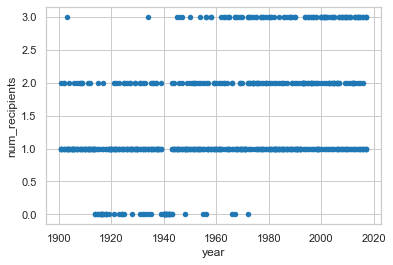

In [105]:
df_awards_past.plot.scatter(x='year', y='num_recipients');

It's hard to see a trend when there are multiple observations per year (**why?**).

Let's try looking at *total* num recipients by year.

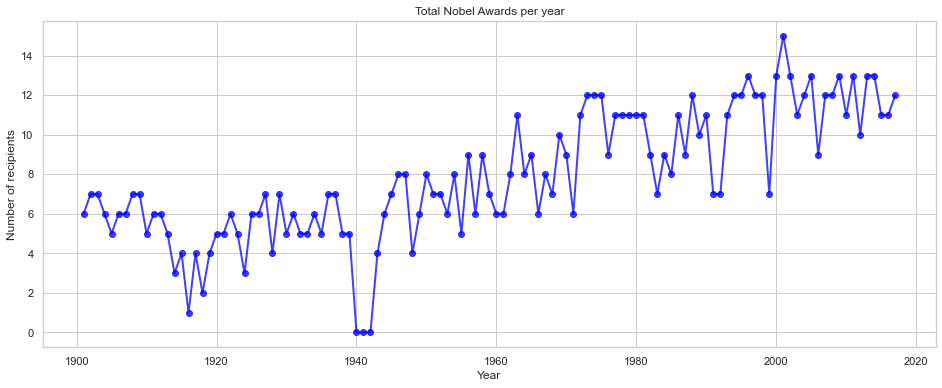

In [108]:
plt.figure(figsize=[16,6])
# plt.plot(df_awards_past.groupby('year').num_recipients.sum(), color = 'b', linewidth='2')
plt.plot(df_awards_past.groupby('year').num_recipients.sum(),  '-ob', linewidth='2', alpha = 0.75)

plt.title('Total Nobel Awards per year')
plt.xlabel('Year')
plt.ylabel('Number of recipients')
plt.grid('on')
plt.show();

Check out the years 1940-43? Any comment? 

Any trends the last 25 years?

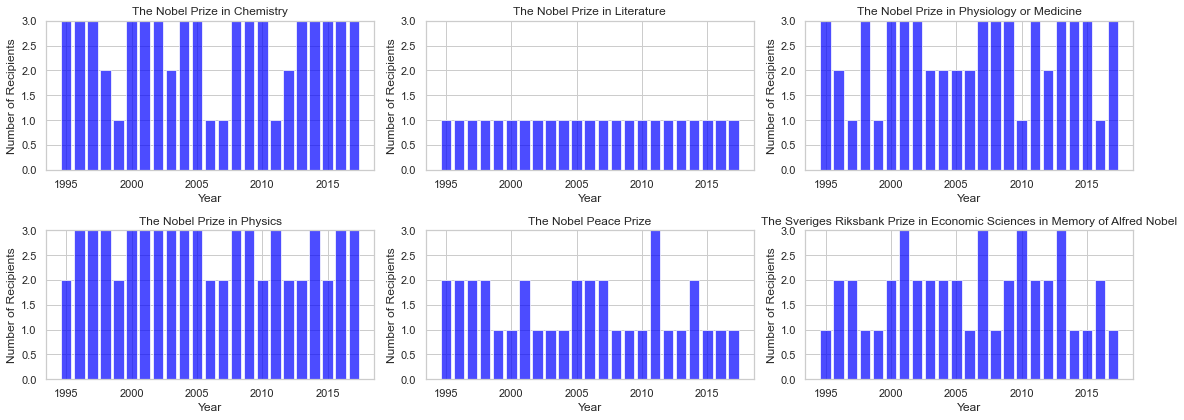

In [109]:
plt.figure(figsize=[16,6])
i = 0
for award in set(df_awards_past.title):
    i += 1
    year = df_awards_past[df_awards_past['title']==award].year
    recips = df_awards_past[df_awards_past['title']==award].num_recipients
    index = year>2019-25
    years_filtered = year[index].values
    recips_filtered = recips[index].values
    plt.subplot(2,3,i)
    plt.bar(years_filtered,recips_filtered, color='b', alpha = 0.7)
    plt.title(award)
    plt.xlabel('Year')
    plt.ylabel('Number of Recipients')
    plt.ylim(0, 3)
plt.tight_layout()

----------------
### End of Standard Section
---------------

## Extra: Did anyone recieve the Nobel Prize more than once (based upon scraped data)?

Here's where it bites us that our original DataFrame isn't "tidy". Let's make a tidy one.

In [110]:
tidy_awards = []
for idx, row in df_awards_past.iterrows():
    for recipient in row['recipients']:
        tidy_awards.append(dict(
            recipient=recipient,
            year=row['year']))
tidy_awards_df = pd.DataFrame(tidy_awards)
tidy_awards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   recipient  923 non-null    object
 1   year       923 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.5+ KB


Now we can look at each recipient individually.

In [111]:
tidy_awards_df.recipient.value_counts()

Comité international de la Croix Rouge (International Committee of the Red Cross)     3
John Bardeen                                                                          2
Marie Curie, née Sklodowska                                                           2
Office of the United Nations High Commissioner for Refugees (UNHCR)                   2
Frederick Sanger                                                                      2
                                                                                     ..
Philipp Eduard Anton von Lenard                                                       1
Paul J. Flory                                                                         1
Isamu Akasaki                                                                         1
Johannes Andreas Grib Fibiger                                                         1
Ahmed H. Zewail                                                                       1
Name: recipient, Length: 916, dt

## Extra: Other structured data formats: JSON and CSV

### CSV
CSV is a lowest-common-denominator format for tabular data.

In [112]:
df_awards_past.to_csv('../data/awards.csv', index=False)
with open('../data/awards.csv', 'r') as f:
    print(f.read()[:1000])

title,year,recipients,num_recipients,motivation
The Nobel Prize in Physics,2017,"['Rainer Weiss', 'Barry C. Barish', 'Kip S. Thorne']",3,“for decisive contributions to the LIGO detector and the observation of gravitational waves”
The Nobel Prize in Chemistry,2017,"['Jacques Dubochet', 'Joachim Frank', 'Richard Henderson']",3,“for developing cryo-electron microscopy for the high-resolution structure determination of biomolecules in solution”
The Nobel Prize in Physiology or Medicine,2017,"['Jeffrey C. Hall', 'Michael Rosbash', 'Michael W. Young']",3,“for their discoveries of molecular mechanisms controlling the circadian rhythm”
The Nobel Prize in Literature,2017,['Kazuo Ishiguro'],1,"“who, in novels of great emotional force, has uncovered the abyss beneath our illusory sense of connection with the world”"
The Nobel Peace Prize,2017,['International Campaign to Abolish Nuclear Weapons (ICAN) '],1,“for its work to draw attention to the catastrophic humanitarian consequences of any use of 

It loses some info, though: the recipients list became a plain string, and the reader needs to guess whether each column is numeric or not.

In [113]:
pd.read_csv('../data/awards.csv').recipients.iloc[20]

"['John O’Keefe', 'May-Britt Moser', 'Edvard I. Moser']"

### JSON

JSON preserves structured data, but fewer data-science tools speak it.

In [114]:
df_awards_past.to_json('../data/awards.json', orient='records')

with open('../data/awards.json', 'r') as f:
    print(f.read()[:1000])

[{"title":"The Nobel Prize in Physics","year":2017,"recipients":["Rainer Weiss","Barry C. Barish","Kip S. Thorne"],"num_recipients":3,"motivation":"\u201cfor decisive contributions to the LIGO detector and the observation of gravitational waves\u201d"},{"title":"The Nobel Prize in Chemistry","year":2017,"recipients":["Jacques Dubochet","Joachim Frank","Richard Henderson"],"num_recipients":3,"motivation":"\u201cfor developing cryo-electron microscopy for the high-resolution structure determination of biomolecules in solution\u201d"},{"title":"The Nobel Prize in Physiology or Medicine","year":2017,"recipients":["Jeffrey C. Hall","Michael Rosbash","Michael W. Young"],"num_recipients":3,"motivation":"\u201cfor their discoveries of molecular mechanisms controlling the circadian rhythm\u201d"},{"title":"The Nobel Prize in Literature","year":2017,"recipients":["Kazuo Ishiguro"],"num_recipients":1,"motivation":"\u201cwho, in novels of great emotional force, has uncovered the abyss beneath our 

Lists and other basic data types are preserved. (Custom data types aren't preserved, but you'll get an error when saving.)

In [115]:
pd.read_json('../data/awards.json').recipients.iloc[20]

['John O’Keefe', 'May-Britt Moser', 'Edvard I. Moser']

## Extra: Pickle: handy for storing data
For temporary data storage in a single version of Python, `pickle`s will preserve your data even more faithfully, even many custom data types. But don't count on it for exchanging data or long-term storage. (In fact, don't try to load untrusted `pickle`s -- they can run arbitrary code!)

In [116]:
df_awards_past.to_pickle('../data/awards.pkl')
with open('../data/awards.pkl', 'r', encoding='latin1') as f:
    print(f.read()[:200])

>      pandas.core.frame	DataFrame)}(_mgrpandas.core.internals.managersBlockManager)(](pandas.core.indexes.base
_new_IndexhIndex}(datanumpy.core.multiarr


Yup, lots of internal Python and Pandas stuff...

In [117]:
pd.read_pickle('../data/awards.pkl').recipients.iloc[20]

['John O’Keefe', 'May-Britt Moser', 'Edvard I. Moser']

## Extra: Formatted data output

Let's make a textual table of Physics laureates by year, earliest first:

In [118]:
for idx, row in df_awards_past.sort_values('year').iterrows():
    if 'Physics' in row['title']:
        print('{}: {}'.format(
            row['year'],
            ', '.join(row['recipients'])))


1901: Wilhelm Conrad Röntgen
1902: Hendrik Antoon Lorentz, Pieter Zeeman
1903: Antoine Henri Becquerel, Pierre Curie, Marie Curie, née Sklodowska
1904: Lord Rayleigh (John William Strutt)
1905: Philipp Eduard Anton von Lenard
1906: Joseph John Thomson
1907: Albert Abraham Michelson
1908: Gabriel Lippmann
1909: Guglielmo Marconi, Karl Ferdinand Braun
1910: Johannes Diderik van der Waals
1911: Wilhelm Wien
1912: Nils Gustaf Dalén
1913: Heike Kamerlingh Onnes
1914: Max von Laue
1915: Sir William Henry Bragg, William Lawrence Bragg
1916: 
1917: Charles Glover Barkla
1918: Max Karl Ernst Ludwig Planck
1919: Johannes Stark
1920: Charles Edouard Guillaume
1921: Albert Einstein
1922: Niels Henrik David Bohr
1923: Robert Andrews Millikan
1924: Karl Manne Georg Siegbahn
1925: James Franck, Gustav Ludwig Hertz
1926: Jean Baptiste Perrin
1927: Arthur Holly Compton, Charles Thomson Rees Wilson
1928: Owen Willans Richardson
1929: Prince Louis-Victor Pierre Raymond de Broglie
1930: Sir Chandrasekhara

## Extra: Parsing JSON to get the Wayback Machine URL

We could go to http://archive.org, search for our URL, and get the URL for the archived version there. But since you'll often need to talk with APIs, let's take this opportunity to use the Wayback Machine's [API](https://archive.org/help/wayback_api.php). This will also give us a chance to practice working with JSON.

In [120]:
url = "https://www.nobelprize.org/prizes/lists/all-nobel-prizes/"
# All 3 of these do the same thing. The third is my (KCA's) favorite new feature of Python 3.6.
wayback_query_url = 'http://archive.org/wayback/available?url={}'.format(url)
wayback_query_url = 'http://archive.org/wayback/available?url={url}'.format(url=url)
wayback_query_url = f'http://archive.org/wayback/available?url={url}'
r = requests.get(wayback_query_url)

We got some kind of response... what is it?

In [121]:
r.text

'{"url": "https://www.nobelprize.org/prizes/lists/all-nobel-prizes/", "archived_snapshots": {"closest": {"timestamp": "20201118045717", "available": true, "status": "200", "url": "http://web.archive.org/web/20201118045717/https://www.nobelprize.org/prizes/lists/all-nobel-prizes/"}}}'

Yay, [JSON](https://en.wikipedia.org/wiki/JSON)! It's usually pretty easy to work with JSON, once we parse it.

In [122]:
json.loads(r.text)

{'url': 'https://www.nobelprize.org/prizes/lists/all-nobel-prizes/',
 'archived_snapshots': {'closest': {'timestamp': '20201118045717',
   'available': True,
   'status': '200',
   'url': 'http://web.archive.org/web/20201118045717/https://www.nobelprize.org/prizes/lists/all-nobel-prizes/'}}}

Loading responses as JSON is so common that `requests` has a convenience method for it:

In [123]:
response_json = r.json()
response_json

{'url': 'https://www.nobelprize.org/prizes/lists/all-nobel-prizes/',
 'archived_snapshots': {'closest': {'timestamp': '20201118045717',
   'available': True,
   'status': '200',
   'url': 'http://web.archive.org/web/20201118045717/https://www.nobelprize.org/prizes/lists/all-nobel-prizes/'}}}

**What kind of object is this?**

A little Python syntax review: **How can we get the snapshot URL?**

In [124]:
snapshot_url = response_json['archived_snapshots']['closest']['url']
snapshot_url

'http://web.archive.org/web/20201118045717/https://www.nobelprize.org/prizes/lists/all-nobel-prizes/'

In [141]:
# `re.findall(r'Marie \S',raw_html)
re.findall(r'(^https?:\/\/[A-Za-z\.\/0-9]+/)',snapshot_url) #jc, only works if ending in trailing-slash
re.findall(r'(^https?:\/\/[\w\.\/]+/)',snapshot_url) #jc


['http://web.archive.org/web/20201118045717/']